In [82]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [83]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
import scipy.stats as stats

dl = DataLib("SignalData")

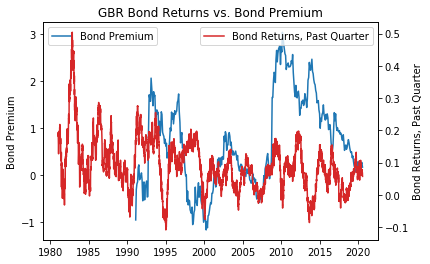

In [84]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')
BondIndex = dl.pull('BondRetIdx/LocalFX')

WEEKDAYS_IN_YEAR = 261

BondReturnMethod1 = BondIndex['GBR'].pct_change().rolling(WEEKDAYS_IN_YEAR).sum()

# Here we calculate the bond premium 
LongMinusShortRates = LongRates - ShortRates
dl.write_data("LongMinusShortRates", LongMinusShortRates)

# Normally we expect greater returns if bond premiums are higher
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Bond Premium'
ax1.plot(LongMinusShortRates['GBR'].to_timestamp(), color = 'tab:blue', label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend(loc=2)
ax2_label = 'Bond Returns, Past Quarter'
ax2.plot(BondReturnMethod1.to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('GBR Bond Returns vs. Bond Premium')
plt.show()

In [85]:
BondPremium = LongMinusShortRates['GBR'].dropna()
StandardizedBondPremium = stats.zscore(BondPremium)
StandardizedBondPremium

array([-1.7349179 , -1.05799757, -0.93120599, -0.88929142, -0.56759709,
       -0.50996455, -0.84108967, -0.81698879, -0.76249985, -0.68914935,
       -0.84737685, -1.309485  , -0.91129657, -0.89033929, -1.28852772,
       -1.016083  , -0.9427325 , -0.869382  , -1.22565586, -1.21517722,
        0.23087549,  1.04820964,  0.96438049,  0.90465223,  1.41915359,
        1.20853287,  0.99581642,  0.80405726,  1.11736868,  1.01677371,
        1.03773099,  0.53475614,  0.56619207,  0.71289306,  0.62906392,
        0.66049985,  0.17533869,  0.46140564,  0.1397113 ,  0.2717422 ,
        0.66993063,  0.61334596,  0.21410967,  0.16171645,  0.12189761,
       -0.0331863 ,  0.06007362, -0.0918667 , -0.03109058, -0.3590721 ,
       -0.23751984, -0.282578  , -0.20817964,  0.0370206 ,  0.31365677,
        0.24344987,  0.66364344,  0.51065526,  0.63325538,  0.40167737,
        0.54733051,  0.69507937,  0.61334596,  0.66364344,  0.68669646,
        0.88159921,  0.92141806,  1.06707119,  0.67621781,  0.44

In [86]:
max(StandardizedBondPremium)
min(StandardizedBondPremium)

-1.957065127454583

In [87]:
# Function that will inputs BondPremium percent changes and outputs a standardized and normalized signal 
# for the last day of percent changes. 

def Signal(data):
    rescaled_data = []
    standardized_data = stats.zscore(data)
    minimum = min(standardized_data)
    maximum = max(standardized_data)
    
    for i in range(len(standardized_data)):
        new_x = (2 *(standardized_data[i]-minimum))/(maximum - minimum) - 1
        rescaled_data.append(new_x)
    
    return rescaled_data[-1]

Signal(BondPremium)
        

-0.3651096282173498